# Business Understanding

# Data Understanding

The data is sourced from [This GitHub Repository](https://github.com/learn-co-curriculum/dsc-project-template/tree/template-mvp/zippedData). You can clone this repository down, rename the "zippedData" folder to "Data". Place it in the root directory of this repo.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
import sqlite3
conn = sqlite3.connect("Data/im.db")

### DataFrame created from relevant imdb data:

In [3]:
imdb_df = pd.read_sql_query("""
                            SELECT 
                                mb.movie_id,
                                mb.primary_title, 
                                mb.genres, 
                                kf.person_id, 
                                p.primary_name,
                                p.primary_profession
                            FROM movie_basics mb
                            JOIN known_for kf
                                USING(movie_id)
                            JOIN persons p
                                USING(person_id)
                            ;
                         
                            """, conn)
imdb_df

,movie_id,primary_title,genres,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,"Action,Crime,Drama",nm1194313,Mahasweta Devi,writer
1,tt0063540,Sunghursh,"Action,Crime,Drama",nm1391276,Anjana Rawail,"writer,costume_designer"
2,tt0069049,The Other Side of the Wind,Drama,nm0000953,Peter Bogdanovich,"actor,director,writer"
3,tt0069049,The Other Side of the Wind,Drama,nm0462648,Oja Kodar,"actress,writer,director"
4,tt0069049,The Other Side of the Wind,Drama,nm0600800,Leslie Moonves,"actor,executive,producer"
...,...,...,...,...,...,...
791001,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272490,Angela Gurgel,"director,writer"
791002,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272491,Ana Célia de Oliveira,"producer,director,writer"
791003,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272748,Cristiano Freitas,"cinematographer,camera_department"
791004,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9275317,Fábio Ferraz,cinematographer


In [4]:
tn_movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv")
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Movie budget data:

In [5]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
tn_movie_budgets['movie'].value_counts()

Halloween                                          3
Home                                               3
King Kong                                          3
House of Wax                                       2
Night of the Living Dead                           2
                                                  ..
Das Weisse Band: Eine deutsche Kindergeschichte    1
Baggage Claim                                      1
The Covenant                                       1
Tu Xia Chuan Qi                                    1
Killing Zoe                                        1
Name: movie, Length: 5698, dtype: int64

In [7]:
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [8]:
imdb_df = pd.read_sql_query("""
                            SELECT 
                                mb.movie_id,
                                mb.primary_title, 
                                mb.genres, 
                                kf.person_id, 
                                p.primary_name,
                                p.primary_profession
                            FROM movie_basics mb
                            JOIN known_for kf
                                USING(movie_id)
                            JOIN persons p
                                USING(person_id)
                            ;
                         
                            """, conn)
imdb_df

,movie_id,primary_title,genres,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,"Action,Crime,Drama",nm1194313,Mahasweta Devi,writer
1,tt0063540,Sunghursh,"Action,Crime,Drama",nm1391276,Anjana Rawail,"writer,costume_designer"
2,tt0069049,The Other Side of the Wind,Drama,nm0000953,Peter Bogdanovich,"actor,director,writer"
3,tt0069049,The Other Side of the Wind,Drama,nm0462648,Oja Kodar,"actress,writer,director"
4,tt0069049,The Other Side of the Wind,Drama,nm0600800,Leslie Moonves,"actor,executive,producer"
...,...,...,...,...,...,...
791001,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272490,Angela Gurgel,"director,writer"
791002,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272491,Ana Célia de Oliveira,"producer,director,writer"
791003,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272748,Cristiano Freitas,"cinematographer,camera_department"
791004,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9275317,Fábio Ferraz,cinematographer


## Data Preparation

For data representing money, I removed the dollar signs and commas within the values and converted them into integers to be able to work with them later. 

In [9]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].astype(int)

In [10]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(int)

In [11]:
tn_movie_budgets.drop(columns=["domestic_gross"], inplace=True)

In [12]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


### Feature Engineering

I created a profit feature that represents the total worldwide gross value for a movie, minus its initial budget to see how profitable the movie was overall. Then, I dropped any unnecessary columns.

In [13]:
tn_movie_budgets['profit'] = tn_movie_budgets.apply(lambda x: x['worldwide_gross'] - x['production_budget'], axis=1)
tn_movie_budgets.head()

,id,release_date,movie,production_budget,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747


In [14]:
tn_movie_budgets.drop(columns=["worldwide_gross"], inplace=True)


In [15]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,profit
0,1,"Dec 18, 2009",Avatar,425000000,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,999721747


For the imdb data, I split the genres by comma to list them individually in separate columns to asses which genres were more or less common later on:

In [16]:
genres_split = imdb_df['genres'].str.split(',', expand=True).add_prefix('genre_')


In [17]:
imdb_df = pd.concat([imdb_df, genres_split], axis=1)
imdb_df.head()

,movie_id,primary_title,genres,person_id,primary_name,primary_profession,genre_0,genre_1,genre_2
0,tt0063540,Sunghursh,"Action,Crime,Drama",nm1194313,Mahasweta Devi,writer,Action,Crime,Drama
1,tt0063540,Sunghursh,"Action,Crime,Drama",nm1391276,Anjana Rawail,"writer,costume_designer",Action,Crime,Drama
2,tt0069049,The Other Side of the Wind,Drama,nm0000953,Peter Bogdanovich,"actor,director,writer",Drama,None,None
3,tt0069049,The Other Side of the Wind,Drama,nm0462648,Oja Kodar,"actress,writer,director",Drama,None,None
4,tt0069049,The Other Side of the Wind,Drama,nm0600800,Leslie Moonves,"actor,executive,producer",Drama,None,None


In [18]:
imdb_genres = pd.DataFrame([imdb_df.primary_title, imdb_df.genre_0, imdb_df.genre_1, imdb_df.genre_2]).transpose()
imdb_genres

,primary_title,genre_0,genre_1,genre_2
0,Sunghursh,Action,Crime,Drama
1,Sunghursh,Action,Crime,Drama
2,The Other Side of the Wind,Drama,None,None
3,The Other Side of the Wind,Drama,None,None
4,The Other Side of the Wind,Drama,None,None
...,...,...,...,...
791001,Chico Albuquerque - Revelações,Documentary,None,None
791002,Chico Albuquerque - Revelações,Documentary,None,None
791003,Chico Albuquerque - Revelações,Documentary,None,None
791004,Chico Albuquerque - Revelações,Documentary,None,None


In [19]:
imdb_genres.rename(columns={'primary_title' : 'Movie_Title'}, inplace=True)
imdb_genres.rename(columns={'genre_0' : 'Primary_Genre'}, inplace=True)
imdb_genres.rename(columns={'genre_1' : 'Secondary_Genre'}, inplace=True)
imdb_genres.rename(columns={'genre_2' : 'Tertiary_Genre'}, inplace=True)

In [20]:
imdb_genres = imdb_genres.drop_duplicates(subset = "Movie_Title")
imdb_genres

,Movie_Title,Primary_Genre,Secondary_Genre,Tertiary_Genre
0,Sunghursh,Action,Crime,Drama
2,The Other Side of the Wind,Drama,None,None
15,Sabse Bada Sukh,Comedy,Drama,None
17,The Wandering Soap Opera,Comedy,Drama,Fantasy
22,A Thin Life,Comedy,None,None
...,...,...,...,...
790988,Kuambil Lagi Hatiku,Drama,None,None
790989,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary,None,None
790996,Dankyavar Danka,Comedy,None,None
790997,6 Gunn,None,None,None


In [21]:
imdb_genres

,Movie_Title,Primary_Genre,Secondary_Genre,Tertiary_Genre
0,Sunghursh,Action,Crime,Drama
2,The Other Side of the Wind,Drama,None,None
15,Sabse Bada Sukh,Comedy,Drama,None
17,The Wandering Soap Opera,Comedy,Drama,Fantasy
22,A Thin Life,Comedy,None,None
...,...,...,...,...
790988,Kuambil Lagi Hatiku,Drama,None,None
790989,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary,None,None
790996,Dankyavar Danka,Comedy,None,None
790997,6 Gunn,None,None,None


In [22]:
imdb_known_by = pd.DataFrame([imdb_df.primary_title, imdb_df.primary_name, imdb_df.primary_profession]).transpose()
imdb_known_by

,primary_title,primary_name,primary_profession
0,Sunghursh,Mahasweta Devi,writer
1,Sunghursh,Anjana Rawail,"writer,costume_designer"
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
3,The Other Side of the Wind,Oja Kodar,"actress,writer,director"
4,The Other Side of the Wind,Leslie Moonves,"actor,executive,producer"
...,...,...,...
791001,Chico Albuquerque - Revelações,Angela Gurgel,"director,writer"
791002,Chico Albuquerque - Revelações,Ana Célia de Oliveira,"producer,director,writer"
791003,Chico Albuquerque - Revelações,Cristiano Freitas,"cinematographer,camera_department"
791004,Chico Albuquerque - Revelações,Fábio Ferraz,cinematographer


In [23]:
imdb_known_by.rename(columns={'primary_title' : 'movie'}, inplace=True)
imdb_known_by.rename(columns={'primary_name' : 'Person_Known_For'}, inplace=True)
imdb_known_by = imdb_known_by.drop_duplicates(subset = "movie")

imdb_known_by

,movie,Person_Known_For,primary_profession
0,Sunghursh,Mahasweta Devi,writer
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
15,Sabse Bada Sukh,Kumud Damle,actress
17,The Wandering Soap Opera,Raoul Ruiz,"director,writer,producer"
22,A Thin Life,Frank Howson,"actor,writer,producer"
...,...,...,...
790988,Kuambil Lagi Hatiku,Keinaya Meissi Gusti,None
790989,Rodolpho Teóphilo - O Legado de um Pioneiro,Janaína Gouveia,"writer,editor,producer"
790996,Dankyavar Danka,Suvarna Kale,actress
790997,6 Gunn,Pranav Raorane,actor


In [25]:
imdb_and_genres = tn_movie_budgets.join(imdb_genres, how='inner')
imdb_and_genres

,id,release_date,movie,production_budget,profit,Movie_Title,Primary_Genre,Secondary_Genre,Tertiary_Genre
0,1,"Dec 18, 2009",Avatar,425000000,2351345279,Sunghursh,Action,Crime,Drama
2,3,"Jun 7, 2019",Dark Phoenix,350000000,-200237650,The Other Side of the Wind,Drama,None,None
15,16,"May 4, 2007",Spider-Man 3,258000000,636860230,Sabse Bada Sukh,Comedy,Drama,None
17,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,617500281,The Wandering Soap Opera,Comedy,Drama,Fantasy
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,984846267,A Thin Life,Comedy,None,None
...,...,...,...,...,...,...,...,...,...
5755,56,"Jan 4, 2013",All Superheroes Must Die,20000,-20000,Bury the Hatchet,Documentary,None,None
5758,59,"Nov 25, 2011",The Ridges,17300,-17300,Chûshingura,None,None,None
5766,67,"Apr 28, 2006",Clean,10000,128711,Bulletface,Thriller,None,None
5776,77,"Dec 31, 2004",The Mongol King,7000,-6100,First Circle,Documentary,None,None


In [26]:
unique_genres = (imdb_and_genres['Primary_Genre'].append(imdb_and_genres['Primary_Genre'])).unique()
print(unique_genres)

['Action' 'Drama' 'Comedy' 'Horror' 'Adventure' 'Documentary' 'Biography'
 'History' 'Animation' 'Crime' None 'Sci-Fi' 'Thriller' 'Fantasy'
 'Mystery' 'Musical' 'Family' 'Western' 'Romance']


In [27]:
sorted_profits = imdb_and_genres.sort_values('profit', ascending=False) 
sorted_profits


,id,release_date,movie,production_budget,profit,Movie_Title,Primary_Genre,Secondary_Genre,Tertiary_Genre
0,1,"Dec 18, 2009",Avatar,425000000,2351345279,Sunghursh,Action,Crime,Drama
33,34,"Jun 12, 2015",Jurassic World,215000000,1433854864,Nema aviona za Zagreb,Biography,None,None
43,44,"Jun 15, 2018",Incredibles 2,200000000,1042520711,So Much for Justice!,History,None,None
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,984846267,A Thin Life,Comedy,None,None
63,64,"Jun 29, 2011",Transformers: Dark of the Moon,195000000,928790543,The Final Journey,Drama,None,None
...,...,...,...,...,...,...,...,...,...
743,44,"Sep 20, 2002",Ballistic: Ecks vs. Sever,70000000,-55705158,In Secret,Crime,Drama,Thriller
744,45,"Aug 10, 2001",Osmosis Jones,70000000,-56403089,Cowboys & Aliens,Action,Sci-Fi,Thriller
535,36,"Feb 21, 2020",Call of the Wild,82000000,-82000000,American Pastoral,Crime,Drama,None
194,95,"Dec 31, 2020",Moonfall,150000000,-150000000,Rice Girl,Adventure,Comedy,Romance


In [28]:
high_profits_w_genres = sorted_profits.nlargest(196, 'profit')
high_profits_w_genres

,id,release_date,movie,production_budget,profit,Movie_Title,Primary_Genre,Secondary_Genre,Tertiary_Genre
0,1,"Dec 18, 2009",Avatar,425000000,2351345279,Sunghursh,Action,Crime,Drama
33,34,"Jun 12, 2015",Jurassic World,215000000,1433854864,Nema aviona za Zagreb,Biography,None,None
43,44,"Jun 15, 2018",Incredibles 2,200000000,1042520711,So Much for Justice!,History,None,None
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,984846267,A Thin Life,Comedy,None,None
63,64,"Jun 29, 2011",Transformers: Dark of the Moon,195000000,928790543,The Final Journey,Drama,None,None
...,...,...,...,...,...,...,...,...,...
3884,85,"Apr 28, 2006",Akeelah and the Bee,8000000,10959424,The Guardians,Comedy,Family,None
2639,40,"Feb 22, 2008",Be Kind Rewind,20000000,10894247,Season of the Witch,Action,Adventure,Fantasy
5677,78,"Feb 8, 1915",The Birth of a Nation,110000,10890000,"Surprise, Surprise",Drama,None,None
5232,33,"Oct 19, 2012",The Sessions,1000000,10495204,Killer by Nature,Adventure,Crime,Drama


In [29]:
primary_genres = sorted_profits.value_counts(subset=high_profits_w_genres['Primary_Genre'], normalize=False, sort=True, ascending=False)
primary_genres

Primary_Genre
Drama          45
Comedy         40
Action         35
Adventure      21
Documentary    13
Biography      12
Horror          7
Crime           7
Fantasy         2
Family          2
Animation       2
Western         1
Thriller        1
Sci-Fi          1
Musical         1
History         1
dtype: int64

In [30]:
secondary_genres = sorted_profits.value_counts(subset=high_profits_w_genres['Secondary_Genre'], normalize=False, sort=True, ascending=False)
secondary_genres

Secondary_Genre
Drama          43
Crime          13
Adventure      13
Comedy         12
Thriller       11
Animation       8
Romance         7
Family          6
Mystery         5
Fantasy         5
Horror          4
History         3
Music           2
Sport           1
Sci-Fi          1
Documentary     1
dtype: int64

In [31]:
tertiary_genres = sorted_profits.value_counts(subset=high_profits_w_genres['Tertiary_Genre'], normalize=False, sort=True, ascending=False)
tertiary_genres

Tertiary_Genre
Romance      12
Sci-Fi       11
Drama        11
Thriller     10
Comedy        9
Fantasy       8
Horror        6
Crime         5
History       4
War           3
Mystery       3
Music         2
Family        2
Western       1
Sport         1
Animation     1
dtype: int64

In [32]:
genre_valuecounts = primary_genres + secondary_genres + tertiary_genres
genre_valuecounts

Action          NaN
Adventure       NaN
Animation      11.0
Biography       NaN
Comedy         61.0
Crime          25.0
Documentary     NaN
Drama          99.0
Family         10.0
Fantasy        15.0
History         8.0
Horror         17.0
Music           NaN
Musical         NaN
Mystery         NaN
Romance         NaN
Sci-Fi         13.0
Sport           NaN
Thriller       22.0
War             NaN
Western         NaN
dtype: float64

In [33]:
high_profits_w_genres.describe()


,id,production_budget,profit
count,196.000000,1.960000e+02,1.960000e+02
mean,53.035714,6.449281e+07,1.685092e+08
std,29.216500,7.217650e+07,2.743930e+08
min,1.000000,1.100000e+05,1.038414e+07
25%,24.750000,1.445000e+07,3.058713e+07
50%,59.500000,3.000000e+07,6.736317e+07
75%,77.000000,8.500000e+07,1.627986e+08
max,100.000000,4.250000e+08,2.351345e+09


In [37]:
knownfor_actor = imdb_known_by[imdb_known_by['primary_profession'].str.contains("actor", "actress", na = False)]
knownfor_actor

,movie,Person_Known_For,primary_profession
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
22,A Thin Life,Frank Howson,"actor,writer,producer"
24,Bigfoot,Mc Jones,"actor,director"
25,Joe Finds Grace,C. Ernst Harth,"actor,producer,soundtrack"
43,So Much for Justice!,Mirko Roggenbock,actor
...,...,...,...
790960,The Holden Family Plan,Joshua Bootz,actor
790967,Wien is 't Hof van Commerce,Flip Kowlier,"composer,actor,soundtrack"
790985,Safeguard,Jens Kristjan,actor
790987,The Secret of China,Wang Peng Kai,actor


In [38]:
knownfor_writer = imdb_known_by[imdb_known_by['primary_profession'].str.contains("writer", na = False)]
knownfor_writer

,movie,Person_Known_For,primary_profession
0,Sunghursh,Mahasweta Devi,writer
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
17,The Wandering Soap Opera,Raoul Ruiz,"director,writer,producer"
22,A Thin Life,Frank Howson,"actor,writer,producer"
49,Children of the Green Dragon,Bence Miklauzic,"director,writer,assistant_director"
...,...,...,...
790940,De Beentjes van Sint Hildegard,Herman Finkers,"actor,writer,composer"
790957,Sokagin Çocuklari,Kasim Uçkan,writer
790980,Vida em Movimento,Selma Perez,"writer,editor"
790983,The Last White Witch,Ryuho Okawa,"writer,producer,executive"


In [39]:
knownfor_director = imdb_known_by[imdb_known_by['primary_profession'].str.contains("director", na = False)]
knownfor_director

,movie,Person_Known_For,primary_profession
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
17,The Wandering Soap Opera,Raoul Ruiz,"director,writer,producer"
24,Bigfoot,Mc Jones,"actor,director"
29,O Silêncio,José Manuel Alves Pereira,"editor,director,producer"
49,Children of the Green Dragon,Bence Miklauzic,"director,writer,assistant_director"
...,...,...,...
790913,Ximei,Gaylen Ross,"director,producer,writer"
790916,Razreshite tebya potselovat... Otets nevesty,Yuriy Morozov,"director,actor,writer"
790922,Hellbiro,Evann Rodriguez,"director,actor,writer"
790946,Swarm Season,Sarah Christman,"miscellaneous,director,editor"


# Exploratory Data Analysis

- figure out how to add value counts of 3 genre columns together
- graph different genres vs profit
- get average budget, compare the budgets of highest profiting movies to that average
        - mean budget = ~43197190, median profit = ~10376510
- filter primary profession for only those containing actor, actress, writer, and director. Get counts for most common profession known for.
    - knownfor actor/actress: 35023; writer: 40991; director: 52977
    - total: 125,670
    - "Of the 125,670 movies in the imdb data, 35023 were known for an actor/actress, 40991 were known for a writer, and 52977 were known for a director"


In [47]:
knownby_df = pd.DataFrame({"Movies Known For":[35023, 40991, 52977]}, 
                  index = ["Actor/Actress", "Writer", "Director"])

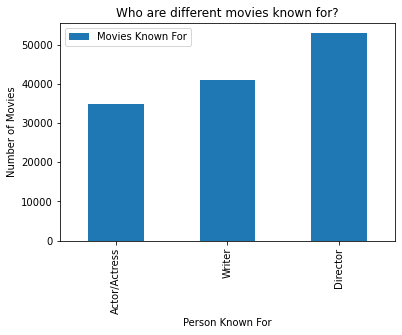

In [59]:
plot1 = knownby_df.plot(kind="bar", title="Who are different movies known for?", ylabel="Number of Movies", xlabel="Person Known For")


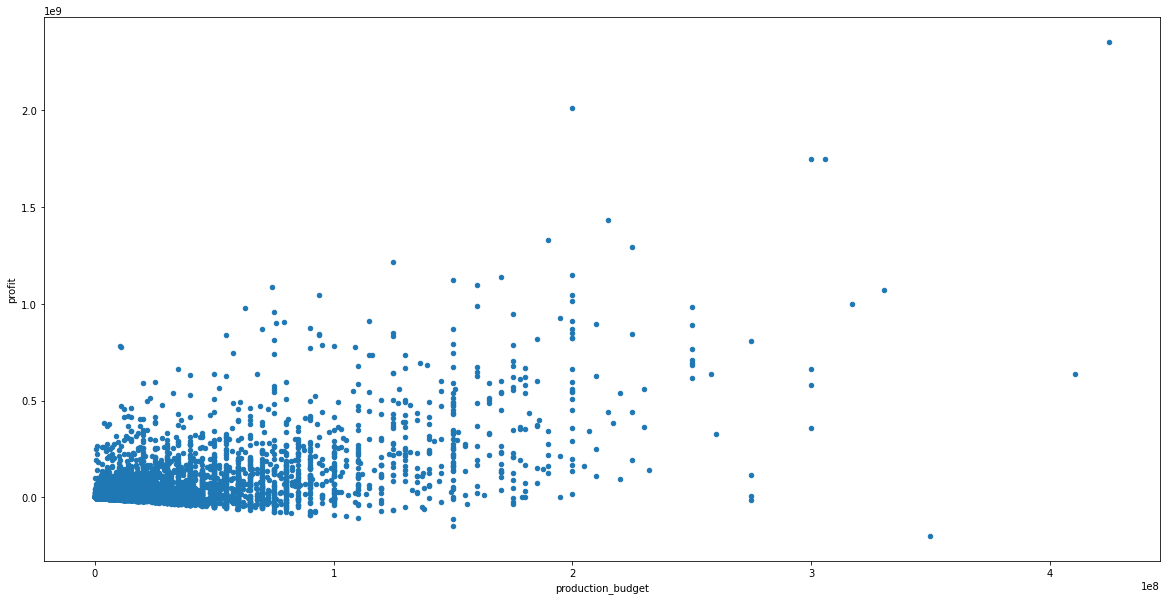

In [57]:
tn_movie_budgets.plot('production_budget', 'profit', kind='scatter', figsize=(20,10));

# Conclusions

## Limitations

## Recommendations

## Next Steps